In [15]:
%load_ext autoreload
%autoreload
import tools as tools
import core as core

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# Open dataset and filter for europe
ds = tools.open_dataset(months=range(1,3+1))
ds_eu = tools.filter_europe_box(ds)

In [3]:
# Main pvpot calculation and grouping
pvpot_pre = core.pv_pot(ds_eu).groupby(ds_eu.valid_time.dt.month).mean("valid_time")

In [4]:
# Do the proper computation
pvpot = tools.dask_compute(pvpot_pre)

<Client: 'tcp://127.0.0.1:33665' processes=20 threads=80, memory=753.83 GiB>
Execution time: 8.26198 seconds


In [5]:
tools.print_pvpot_stats(pvpot)

Calculated pvpot:
    Shape: (3, 141, 161)
    Months: 3
    Min: 0.00024747772840783
    Mean: 0.08602927625179291
    Max: 0.24219587445259094
    Std: 0.05736839026212692
    


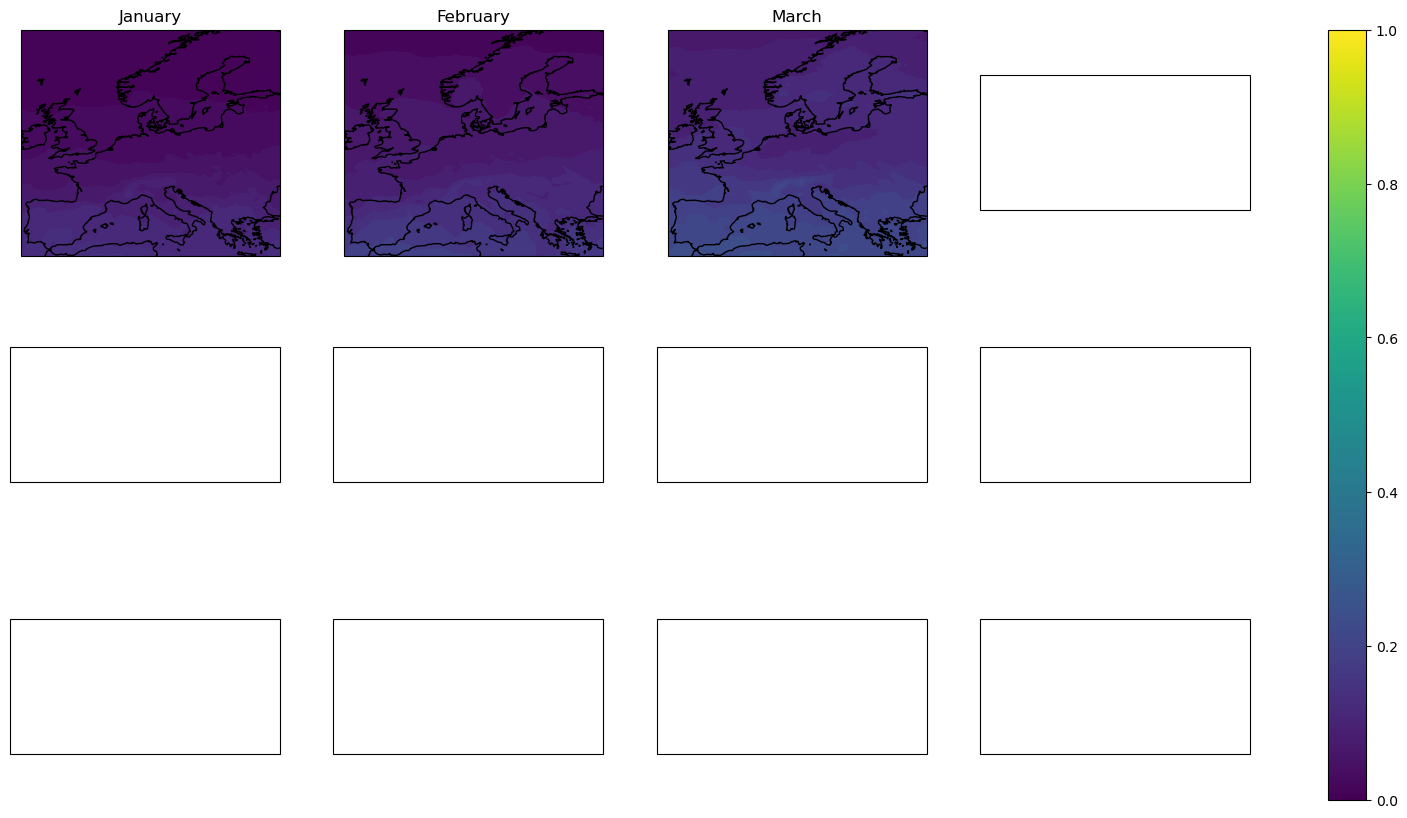

In [16]:
tools.plot_pvpot_per_month(pvpot)